In [39]:
import numpy as np
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
df = pd.read_csv('../input/marketing-data-for-a-supermarket-in-united-states/supermarket_marketing/Supermarket_CustomerMembers.csv')

In [41]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
df.shape

(200, 5)

## **K-Means**

    
    
K-means is known for its simplicity and efficiency, and it is widely used in various applications such as customer segmentation, image compression, and data preprocessing. However, K-means requires specifying the number of clusters (K) in advance, and its performance can be influenced by the initial placement of centroids, making it sensitive to the choice of initializations. Various techniques, such as the K-means++ initialization method, can be used to improve the robustness of K-means.

- 1- Initialization: The algorithm starts by randomly selecting K initial centroids, one for each cluster. These centroids can be randomly chosen data points or located at specific positions in the feature space.

- 2- Assignment: For each data point in the dataset, the algorithm calculates its distance to all K centroids and assigns it to the cluster associated with the nearest centroid. This step creates K clusters.
        
- 3- Update Centroids: After all data points have been assigned to clusters, the algorithm recalculates the centroids for each cluster by taking the mean of all data points in that cluster. These new centroids become the center of their respective clusters.

- 4- Repeat: Steps 2 and 3 are repeated iteratively until a stopping condition is met. The most common stopping conditions include a maximum number of iterations or when the centroids no longer change significantly between iterations.

- 5- Convergence: Eventually, the algorithm converges, and the final centroids represent the cluster centers.

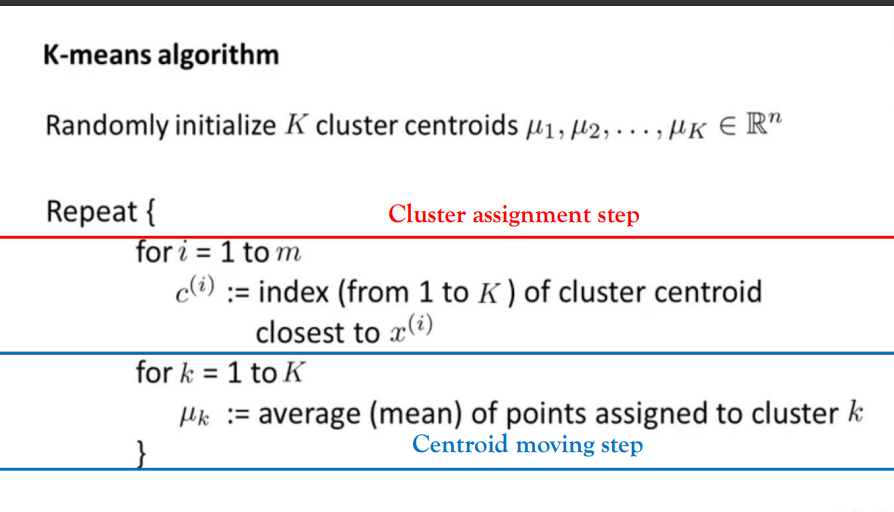

<h4> Clustering on Annual Income and Spending Score </h4>

In [43]:
X = df.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Cost_Function= 269981.28 with 1 Clusters
Cost_Function= 181363.59595959593 with 2 Clusters
Cost_Function= 106348.37306211119 with 3 Clusters
Cost_Function= 73679.78903948834 with 4 Clusters
Cost_Function= 44448.45544793371 with 5 Clusters
Cost_Function= 37265.86520484346 with 6 Clusters
Cost_Function= 30227.606513152015 with 7 Clusters
Cost_Function= 25061.30411906934 with 8 Clusters
Cost_Function= 22830.10333064868 with 9 Clusters
Cost_Function= 19634.55462934998 with 10 Clusters


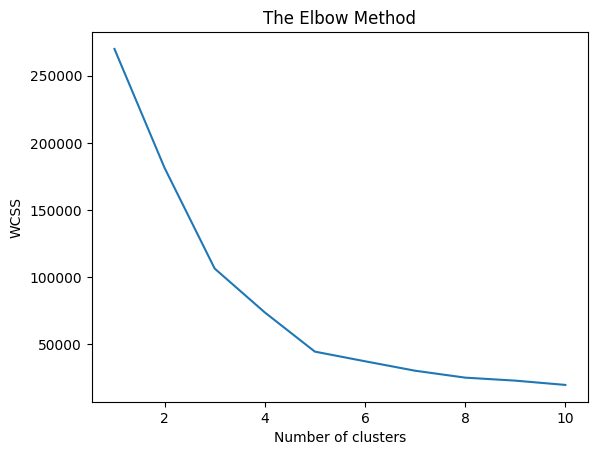

In [44]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []            ## total distances from the centeriods
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    print('Cost_Function=',kmeans.inertia_,'with', i, 'Clusters')
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Observation**: will choose  clusters = 5 where cost function = 44448.4554479337 because after number of clusters = 5 the change in cost function is not very drastic as the change before number of clusters = 5



In [45]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


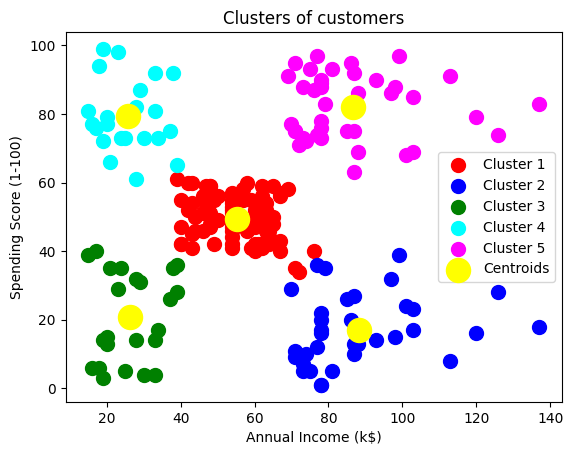

In [46]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<h4> Clustering on Age, Annual Income and Spending Score </h4>

In [47]:
X = df.iloc[:, [2,3, 4]].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Cost_Function= 308812.78 with 1 Clusters
Cost_Function= 212840.1698209719 with 2 Clusters
Cost_Function= 143342.751571706 with 3 Clusters
Cost_Function= 104374.1598511286 with 4 Clusters
Cost_Function= 75350.77917248776 with 5 Clusters
Cost_Function= 58300.44332159069 with 6 Clusters
Cost_Function= 51084.50595493436 with 7 Clusters
Cost_Function= 44310.50582506423 with 8 Clusters
Cost_Function= 40809.751227205954 with 9 Clusters
Cost_Function= 37682.61360218729 with 10 Clusters


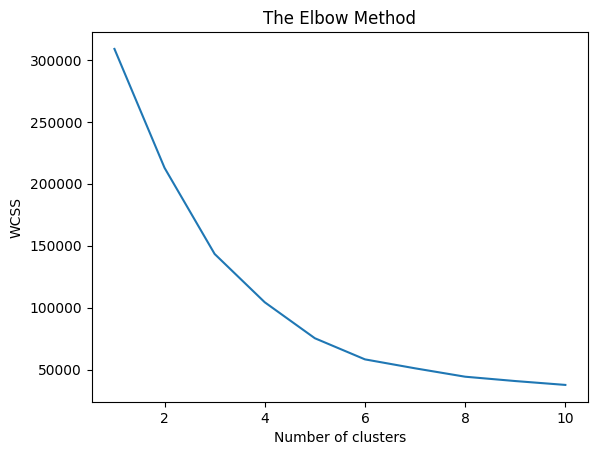

In [48]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []            ## total distances from the centeriods
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    print('Cost_Function=',kmeans.inertia_,'with', i, 'Clusters')
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Observation**: will choose  clusters = 5 where cost function = 75350.77917248776



In [49]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


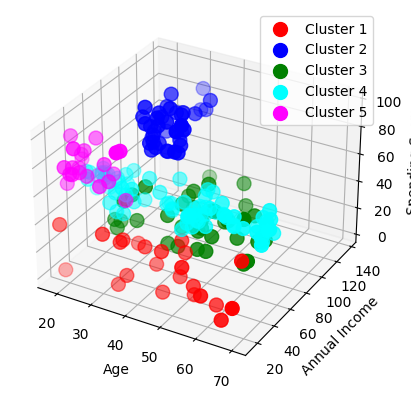

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s=100, c='blue', label='Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s=100, c='green', label='Cluster 3')
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s=100, c='cyan', label='Cluster 4')
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s=100, c='magenta', label='Cluster 5')



ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.legend()

plt.show()


**Observation**: When clustering based on three variables, the clusters may not be as visually distinct as when using only two variables. However, adding "Age" as the third variable is crucial for customer targeting, as age significantly influences customer segmentation.

<h1> <b>Hierarchical Clustering</b></h1>



Hierarchical clustering is a type of unsupervised machine learning algorithm used for cluster analysis, specifically for grouping data objects into nested clusters. Unlike K-means, which partitions data into a fixed number of clusters, hierarchical clustering creates a hierarchy or tree-like structure of clusters, often represented as a dendrogram.

The key idea behind hierarchical clustering is to iteratively merge or split clusters, starting with each data point as its own cluster and progressively building a hierarchical structure.

In hierarchical clustering, there are various linkage (linking) methods and metric (distance) types that can be used to determine how clusters are formed and how distances between data points are calculated. Here are common linkage methods and distance metrics used in hierarchical clustering:

**Linkage Methods (How clusters are merged):**

1. **Single Linkage**: This method merges clusters based on the minimum pairwise distance between any two points in the clusters. It tends to create long, chain-like clusters and is sensitive to outliers.

2. **Complete Linkage**: This method merges clusters based on the maximum pairwise distance between any two points in the clusters. It tends to create compact, spherical clusters and is less sensitive to outliers.

3. **Average Linkage**: This method merges clusters based on the average pairwise distance between all points in the clusters. It balances between single and complete linkage and is often a good compromise.

4. **Ward Linkage**: This method minimizes the increase in the total within-cluster variance when merging clusters. It often results in compact, equally sized clusters and is less sensitive to outliers.



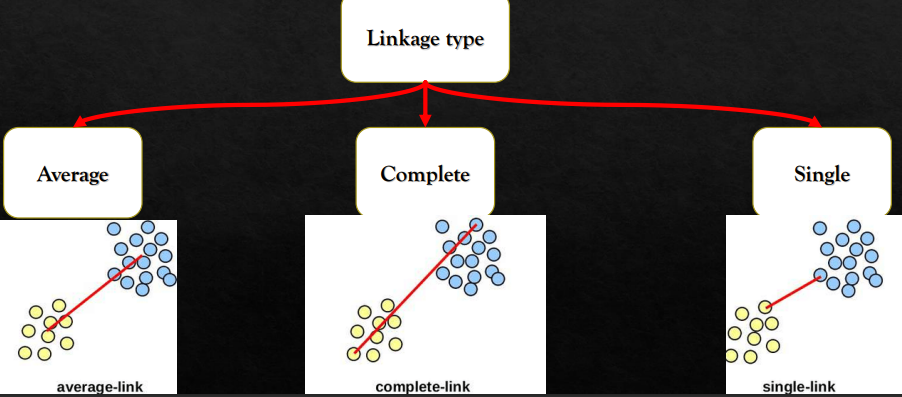

**Metric Types (How distances between data points are calculated):**

1. **Euclidean Distance**: The most common metric, it calculates the straight-line (shortest) distance between two points in a Euclidean space. It's suitable for continuous data.


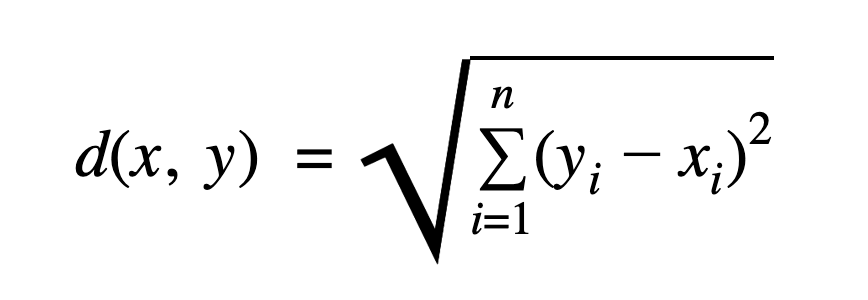


2. **Manhattan (City Block) Distance**: Also known as L1 distance, it calculates the sum of absolute differences along each dimension. It's suitable for data with different scales.



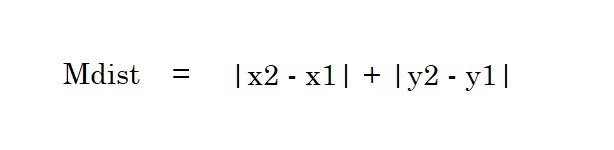

3. **Cosine Similarity**: Measures the cosine of the angle between two vectors, often used for text and high-dimensional data where the magnitude of vectors is less important.

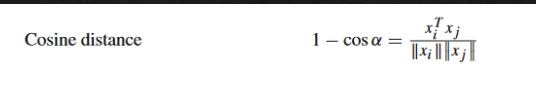

<h3>- Agglomerative Clustering </h3>

<h5> Distance <b>Euclidean</b> against all linkage Types </h5>

- **Distance** : Euclidean
- **Linkage** : Ward

In [51]:
X = df.iloc[:, [3, 4]].values

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


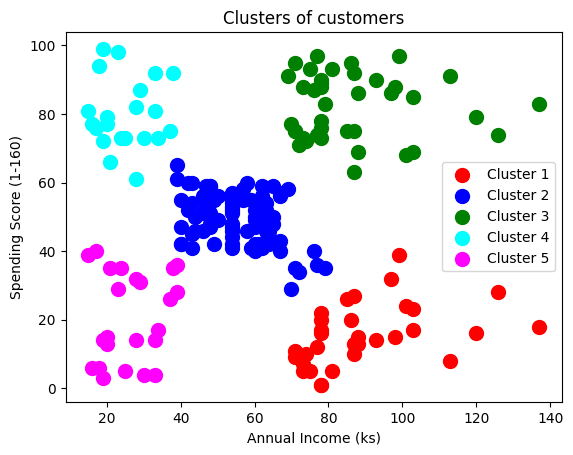

In [52]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt. title("Clusters of customers")
plt.xlabel("Annual Income (ks)")
plt.ylabel("Spending Score (1-160)")
plt. legend()
plt.show()

**Observation**: Linkage ward and metric euclidean may not be the most efficient clustering approach, as it's evident that the resulting clusters are somewhat dispersed. For instance, the data points assigned to cluster 2 are not closely grouped together.

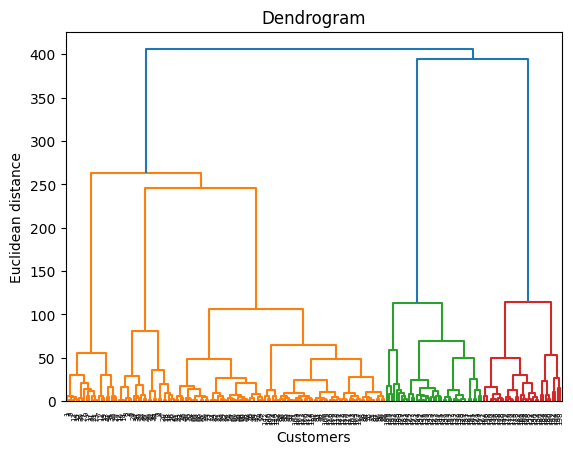

In [53]:
import scipy.cluster.hierarchy as sch

dendrogrm_ward_euclidean = sch.dendrogram(sch.linkage(X, method ="ward", metric ='euclidean'))
plt.title('Dendrogram')
plt.xlabel ('Customers')
plt.ylabel('Euclidean distance')
plt.show()

- **Distance** : Euclidean
- **Linkage** : Average

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


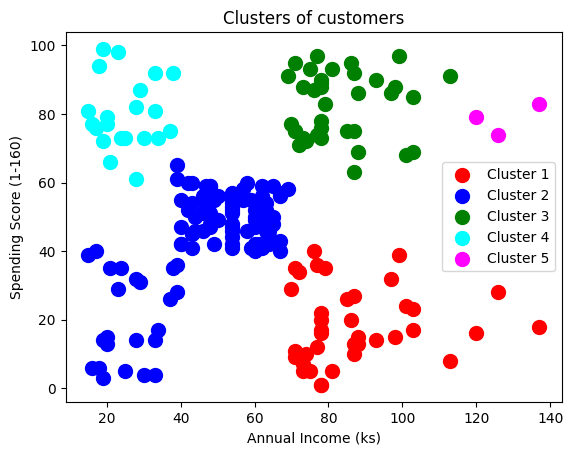

In [54]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt. title("Clusters of customers")
plt.xlabel("Annual Income (ks)")
plt.ylabel("Spending Score (1-160)")
plt. legend()
plt.show()

**Observation**: when using linkage average and metric euclidean it seems that the clusters are way more dispersed using average linking and single data points are identified as clusters

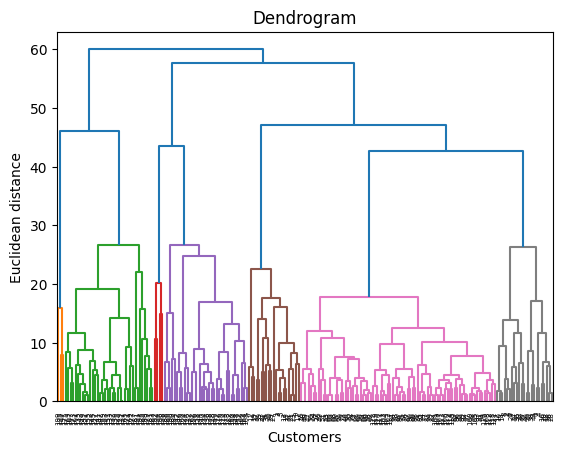

In [55]:
import scipy.cluster.hierarchy as sch

dendrogrm_average_euclidean = sch.dendrogram(sch.linkage(X, method ="average", metric ='euclidean'))
plt.title('Dendrogram')
plt.xlabel ('Customers')
plt.ylabel('Euclidean distance')
plt.show()

- **Distance** : Euclidean
- **Linkage** : Complete





/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


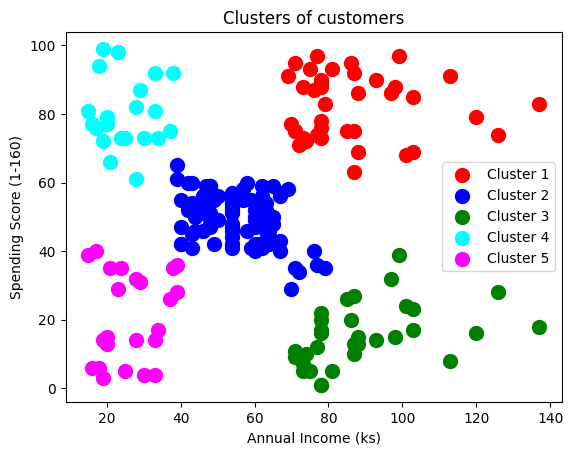

In [56]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt. title("Clusters of customers")
plt.xlabel("Annual Income (ks)")
plt.ylabel("Spending Score (1-160)")
plt. legend()
plt.show()

**Observation**: when using linkage complete and metric euclidean . Results are very much similar to when linkage ward was used. No major difference

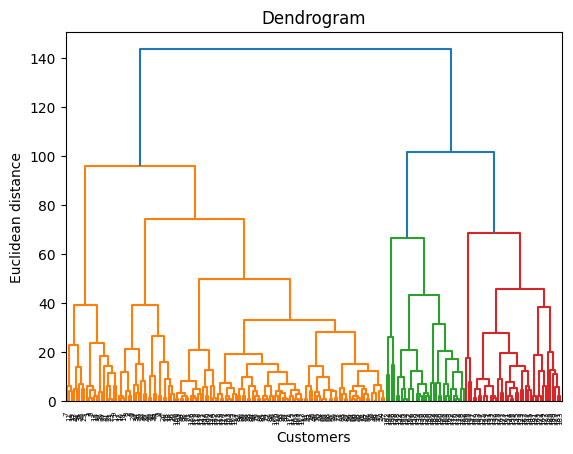

In [57]:
import scipy.cluster.hierarchy as sch

dendrogrm_complete_euclidean = sch.dendrogram(sch.linkage(X, method ="complete", metric ='euclidean'))
plt.title('Dendrogram')
plt.xlabel ('Customers')
plt.ylabel('Euclidean distance')
plt.show()

- **Distance** : Euclidean
- **Linkage** : Single

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


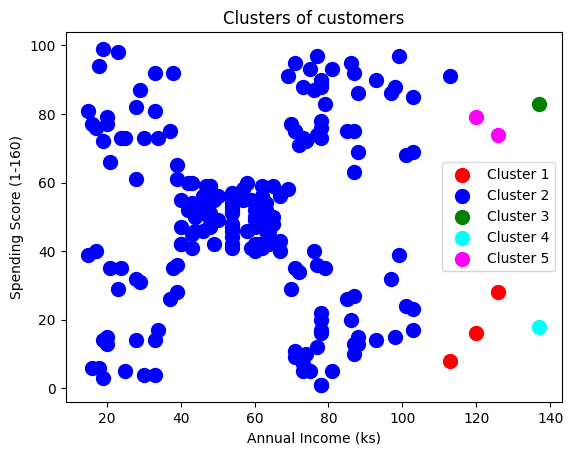

In [58]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt. title("Clusters of customers")
plt.xlabel("Annual Income (ks)")
plt.ylabel("Spending Score (1-160)")
plt. legend()
plt.show()

**Observation**: when using linkage single and metric euclidean. Results are worse than all the previous linking techniques. Because there are individual data points that are identified as clusters

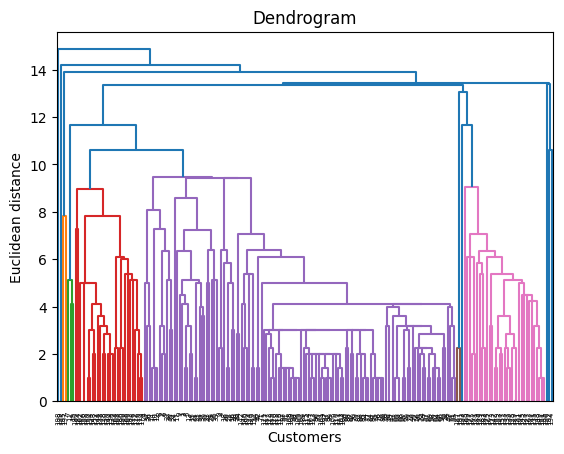

In [59]:
import scipy.cluster.hierarchy as sch

dendrogrm_single_euclidean = sch.dendrogram(sch.linkage(X, method ="single", metric ='euclidean'))
plt.title('Dendrogram')
plt.xlabel ('Customers')
plt.ylabel('Euclidean distance')
plt.show()

<h4> Distance <b>Manhattan</b> against all linkage Types </h4>

- **Distance** : Manhattan
- **Linkage** : Average

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


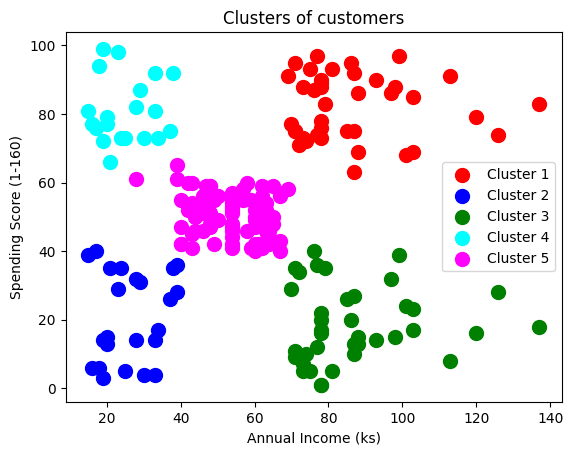

In [60]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'manhattan', linkage = 'average')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt. title("Clusters of customers")
plt.xlabel("Annual Income (ks)")
plt.ylabel("Spending Score (1-160)")
plt. legend()
plt.show()

**Observation**: when using linkage average and metric manhattan . Clusters are not dispersed at all , similar to k-means

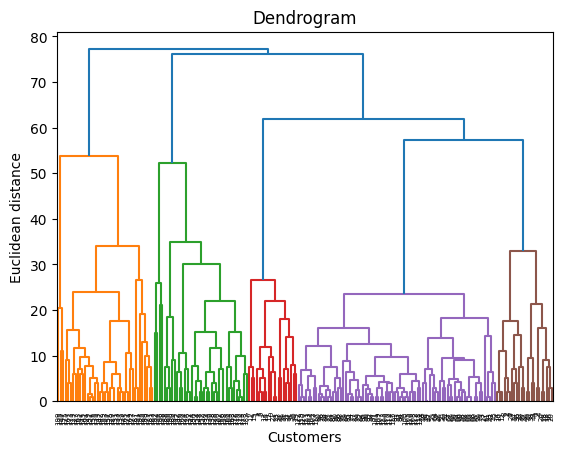

In [61]:
import scipy.cluster.hierarchy as sch

dendrogrm_average_manhattan = sch.dendrogram(sch.linkage(X, method ="average", metric ='cityblock'))
plt.title('Dendrogram')
plt.xlabel ('Customers')
plt.ylabel('Euclidean distance')
plt.show()

- **Distance** : Euclidean
- **Linkage** : Complete





/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


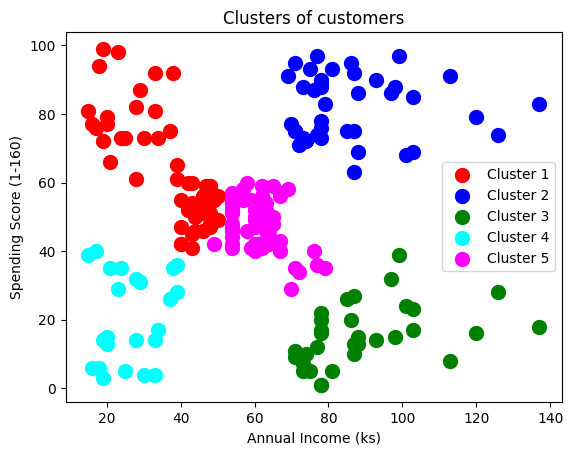

In [62]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'manhattan', linkage = 'complete')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt. title("Clusters of customers")
plt.xlabel("Annual Income (ks)")
plt.ylabel("Spending Score (1-160)")
plt. legend()
plt.show()

**Observation**: when using linkage complete and metric manhattan . clusters are very similar to when linkage average was used. Almost the same. They are not dispersed at all

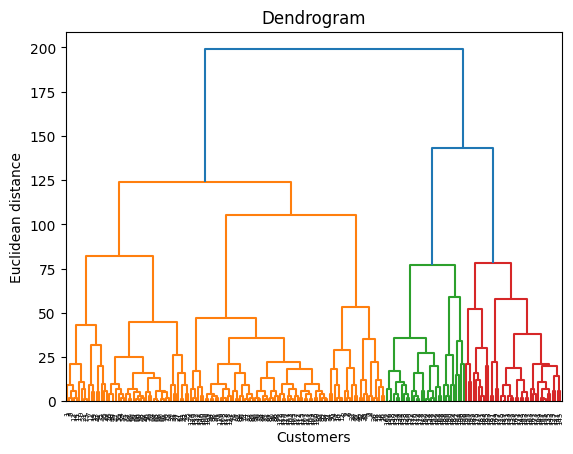

In [63]:
import scipy.cluster.hierarchy as sch

dendrogrm_complete_manhattan = sch.dendrogram(sch.linkage(X, method ="complete", metric ='cityblock'))
plt.title('Dendrogram')
plt.xlabel ('Customers')
plt.ylabel('Euclidean distance')
plt.show()

- **Distance** : Euclidean
- **Linkage** : Single

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


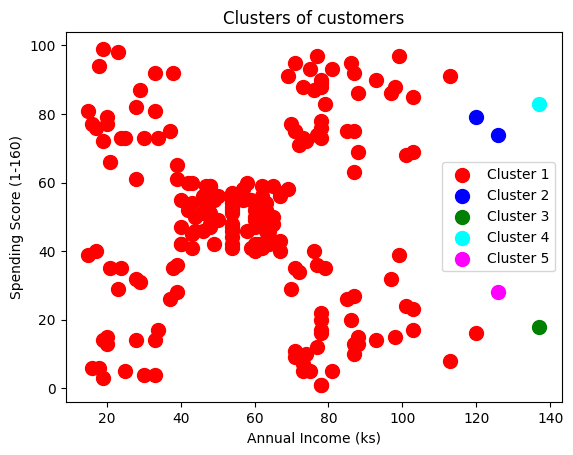

In [64]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'manhattan', linkage = 'single')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt. title("Clusters of customers")
plt.xlabel("Annual Income (ks)")
plt.ylabel("Spending Score (1-160)")
plt. legend()
plt.show()

**Observation**: it is obvious that single linking has the worst performance out of all linking techniques regardless of the distance metric used because euclidean and manhattan showed the same results when using single linking

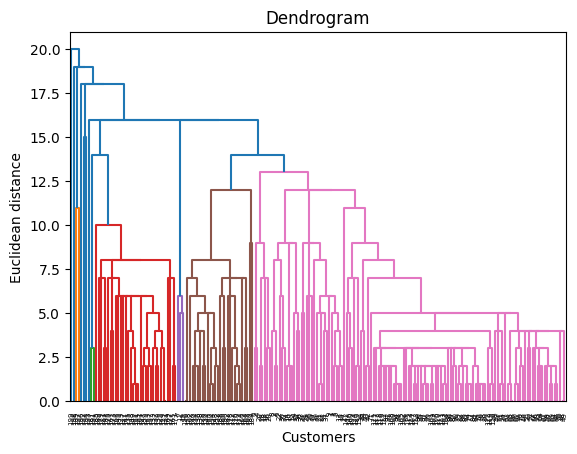

In [65]:
import scipy.cluster.hierarchy as sch

dendrogrm_single_manhattan = sch.dendrogram(sch.linkage(X, method ="single", metric ='cityblock'))
plt.title('Dendrogram')
plt.xlabel ('Customers')
plt.ylabel('Euclidean distance')
plt.show()

<h4> Distance <b>Cosine</b> against all linkage Types </h4>

- **Distance** : Cosine
- **Linkage** : Average

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


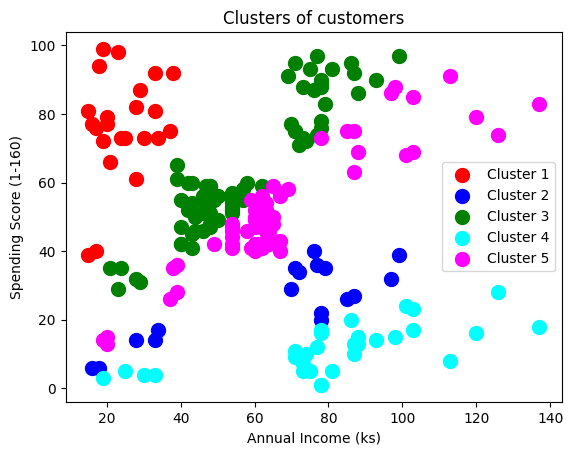

In [66]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'cosine', linkage = 'average')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')


plt.title("Clusters of customers")
plt.xlabel("Annual Income (ks)")
plt.ylabel("Spending Score (1-160)")
plt.legend()
plt.show()

**Observation**: when using linkage average and metric cosine . Dispersion is high . Clusters are not distinct at all

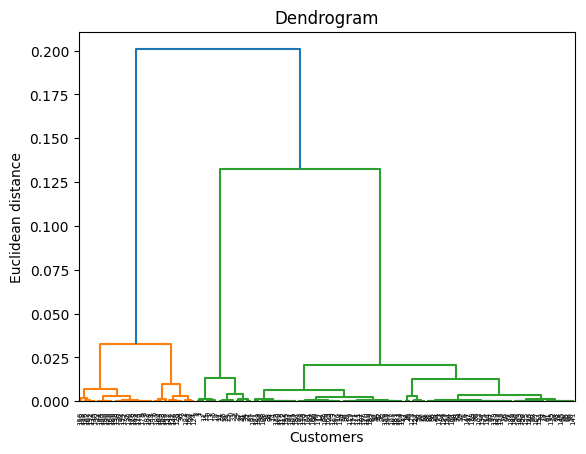

In [67]:
import scipy.cluster.hierarchy as sch

dendrogrm_average_cosine = sch.dendrogram(sch.linkage(X, method ="average", metric ='cosine'))
plt.title('Dendrogram')
plt.xlabel ('Customers')
plt.ylabel('Euclidean distance')
plt.show()

- **Distance** : Cosine
- **Linkage** : Complete





/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


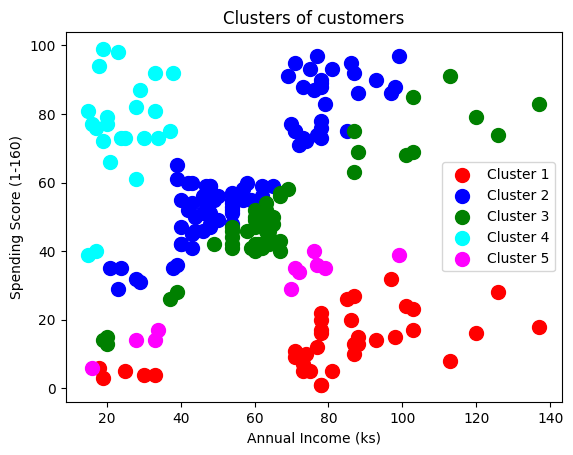

In [68]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'cosine', linkage = 'complete')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt. title("Clusters of customers")
plt.xlabel("Annual Income (ks)")
plt.ylabel("Spending Score (1-160)")
plt. legend()
plt.show()

**Observation**: when using linkage complete and metric cosine . some clusters are dispersed and some are not

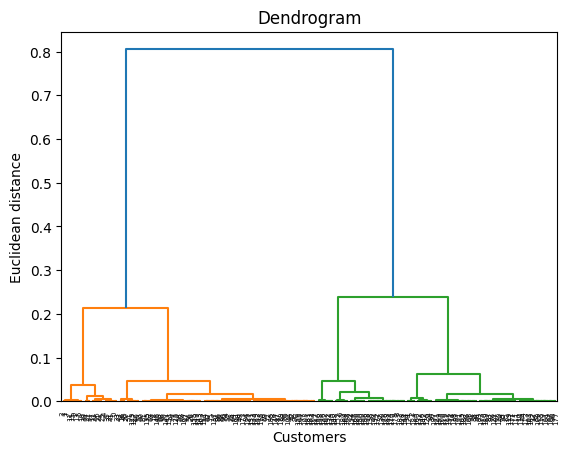

In [69]:
import scipy.cluster.hierarchy as sch

dendrogrm_complete_cosine = sch.dendrogram(sch.linkage(X, method ="complete", metric ='cosine'))
plt.title('Dendrogram')
plt.xlabel ('Customers')
plt.ylabel('Euclidean distance')
plt.show()

- **Distance** : Cosine
- **Linkage** : Single

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


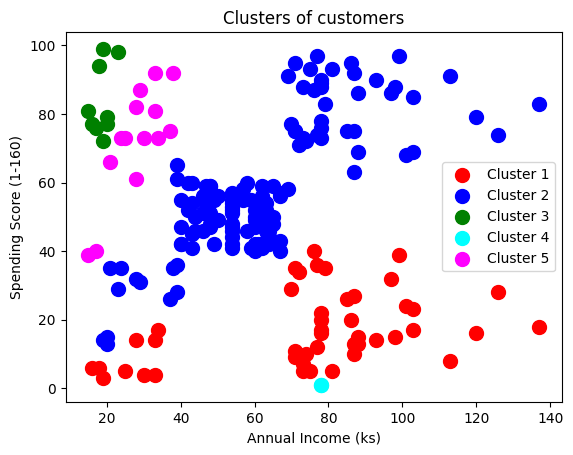

In [70]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'cosine', linkage = 'single')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt. title("Clusters of customers")
plt.xlabel("Annual Income (ks)")
plt.ylabel("Spending Score (1-160)")
plt. legend()
plt.show()

**Observation**: same behavior for single linking regardless of metric used because single data points are identified as clusters . also clusters are somehow dispersed

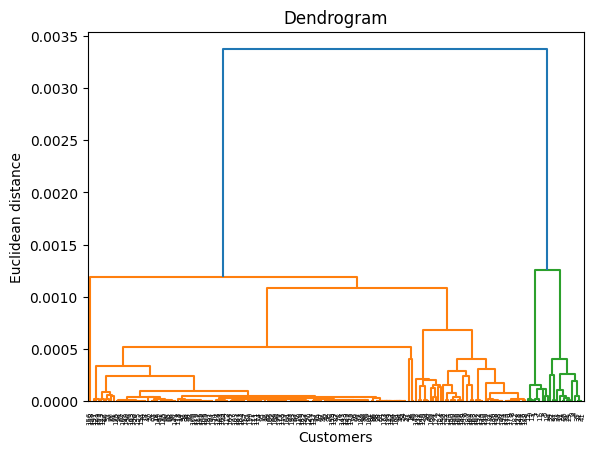

In [71]:
import scipy.cluster.hierarchy as sch

dendrogrm_single_cosine = sch.dendrogram(sch.linkage(X, method ="single", metric ='cosine'))
plt.title('Dendrogram')
plt.xlabel ('Customers')
plt.ylabel('Euclidean distance')
plt.show()

<h1> Comparison </h1>

<h2> Comparison between dendograms </h2>

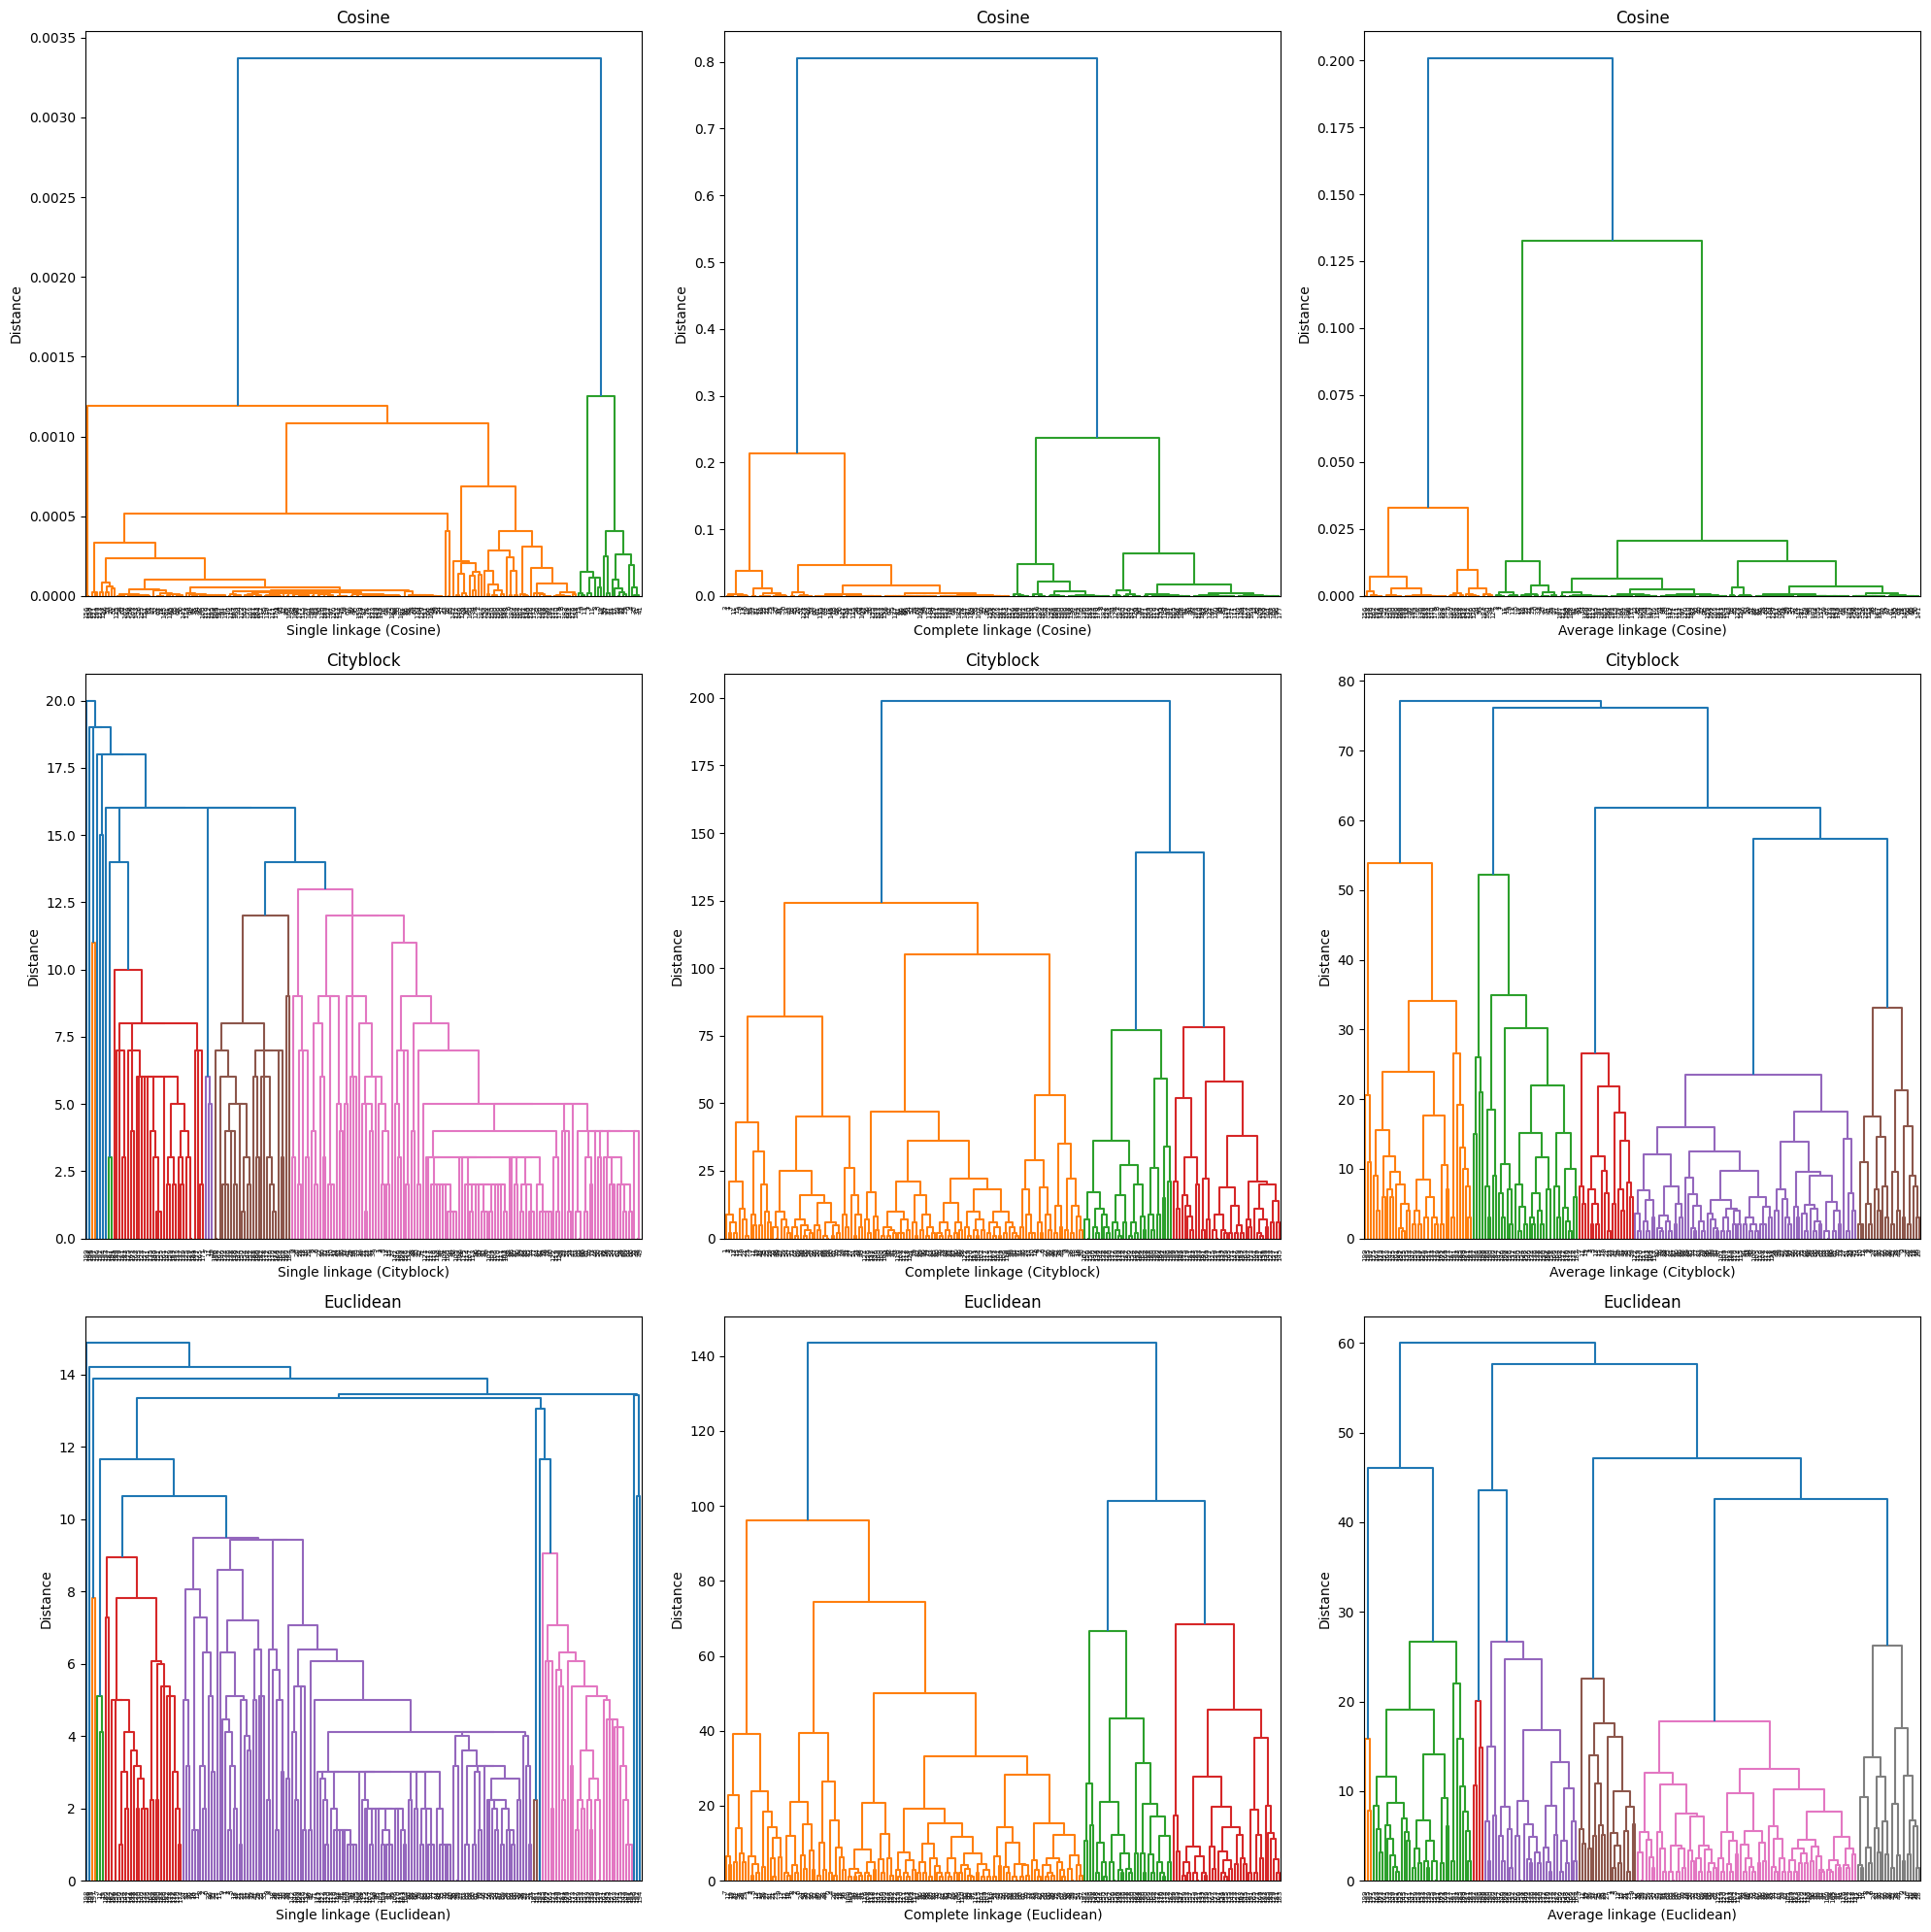

In [72]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

fig, axs = plt.subplots(3, 3, figsize=(20, 20))

metrics = ['cosine', 'cityblock', 'euclidean']
linkage_methods = ['single', 'complete', 'average']

for i, metric in enumerate(metrics):
    for j, linkage in enumerate(linkage_methods):
        dendrogram = sch.dendrogram(sch.linkage(X, method=linkage, metric=metric), ax=axs[i, j])

        axs[i, j].set_xlabel(f"{linkage.capitalize()} linkage ({metric.capitalize()})")

        axs[i, j].set_title(metric.capitalize())
        axs[i, j].set_ylabel("Distance")

plt.tight_layout()

plt.show()


<h2> Comparison between scatter plots </h3>

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

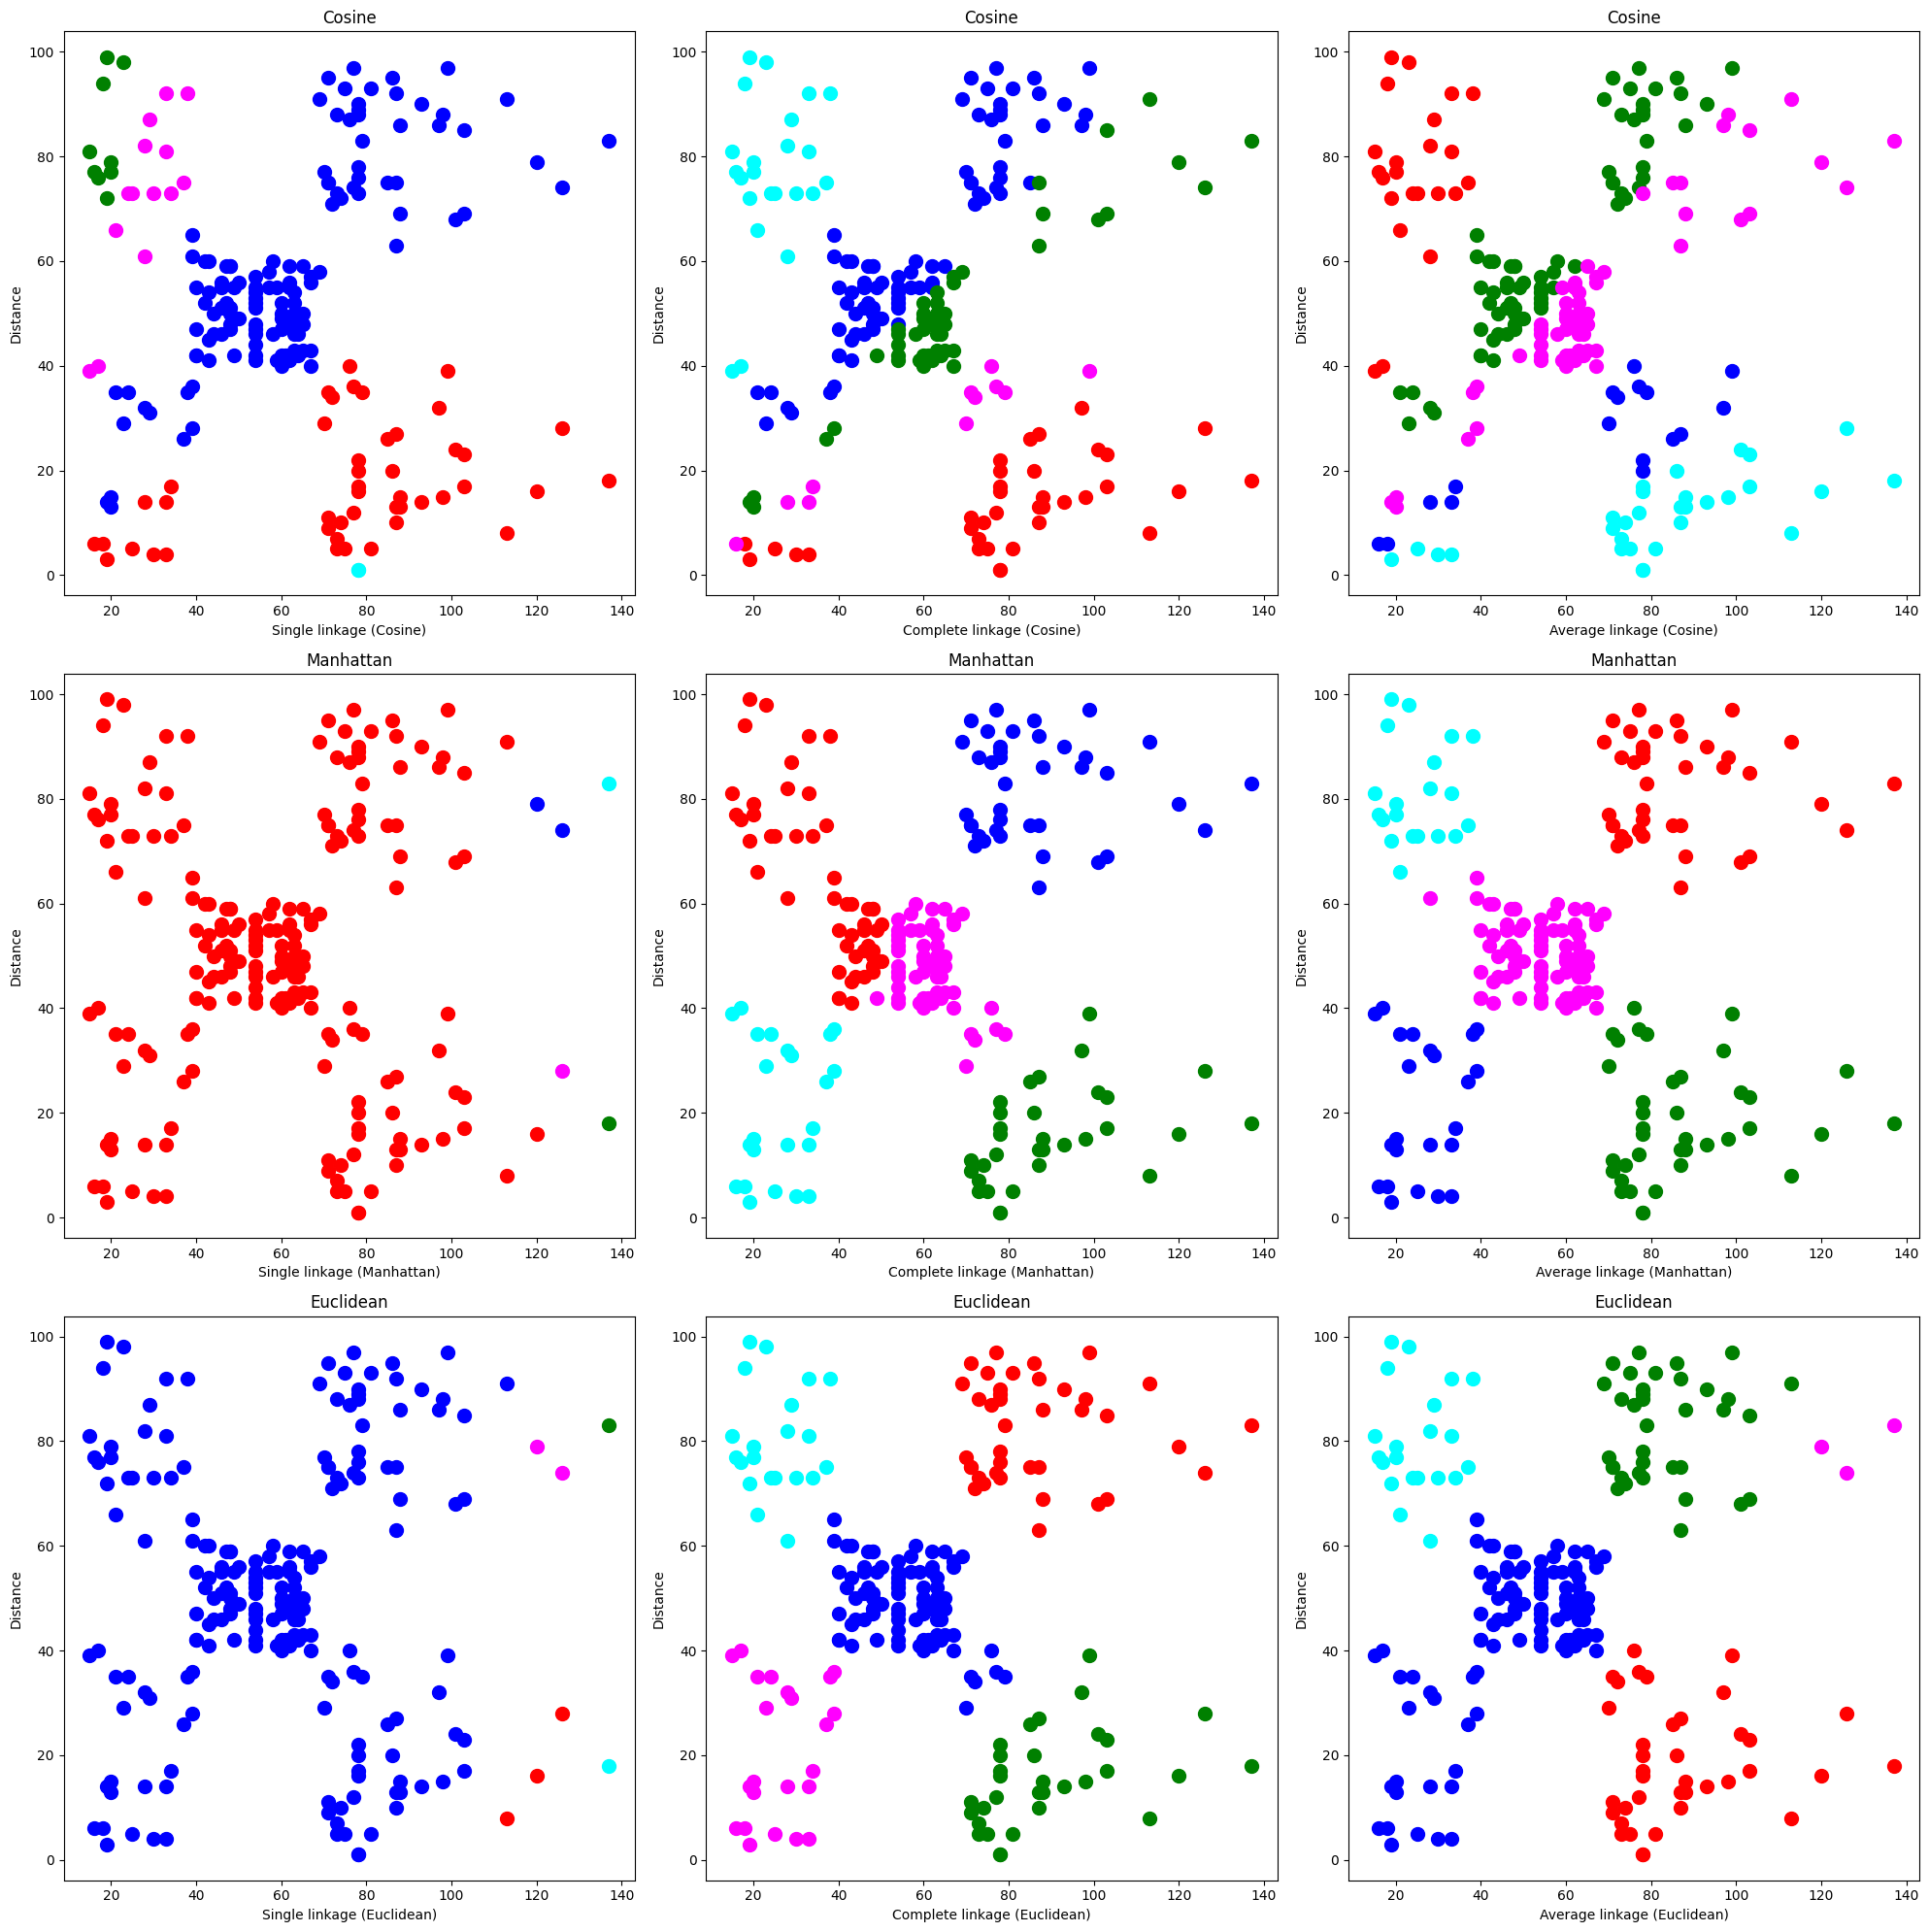

In [73]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

fig, axs = plt.subplots(3, 3, figsize=(20, 20))

metrics = ['cosine', 'manhattan', 'euclidean']
linkage_methods = ['single', 'complete', 'average']

for i, metric in enumerate(metrics):
    for j, linkage in enumerate(linkage_methods):
        hc = AgglomerativeClustering(n_clusters=5, affinity=metric, linkage=linkage)
        y_hc = hc.fit_predict(X)

        axs[i, j].scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
        axs[i, j].scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
        axs[i, j].scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
        axs[i, j].scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
        axs[i, j].scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
        axs[i, j].set_xlabel(f"{linkage.capitalize()} linkage ({metric.capitalize()})")

        axs[i, j].set_title(metric.capitalize())
        axs[i, j].set_ylabel("Distance")

plt.tight_layout()

plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


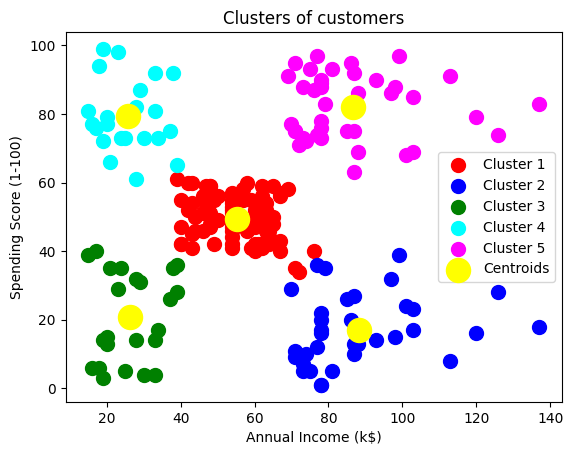

In [74]:
# Visualising the clusters

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Observation and conclusion**: Single linkage behaves consistently across all metrics, whereas complete and average linkage exhibit similar behavior. Consequently, I think K-means clustering outperforms agglomerative clustering in terms of cluster classification.